<a href="https://colab.research.google.com/github/JamshidbekYusupov/Mohirdev_Tutorial_Codes/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import fastai
import numpy as np



In [ ]:
torch.cuda.is_available()

True

In [ ]:
from fastai.vision.all import *


path = untar_data(URLs.CAMVID_TINY)

path.ls()


(#3) [Path('/root/.fastai/data/camvid_tiny/labels'),Path('/root/.fastai/data/camvid_tiny/codes.txt'),Path('/root/.fastai/data/camvid_tiny/images')]

In [ ]:
##LabelGetter

def LabelGetter(file):
  return path/'labels'/ f'{file.stem}_P{file.suffix}'

### DataLoaders

dls = SegmentationDataLoaders.from_label_func(
    path, bs = 8,
    fnames = get_image_files(path/'images'),
    label_func = LabelGetter,
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

### Training and doing Fine Tune
learn = unet_learner(dls, resnet34)

learn.fine_tune(10)



epoch,train_loss,valid_loss,time
0,3.689801,2.706806,00:01


epoch,train_loss,valid_loss,time
0,2.057283,1.646753,00:01
1,1.720480,1.476976,00:01
2,1.525149,1.148066,00:01
3,1.356664,1.111718,00:01
4,1.225549,0.933206,00:01
5,1.103956,0.861107,00:01
6,0.997290,0.786654,00:01
7,0.908146,0.771730,00:01
8,0.835826,0.763323,00:01
9,0.777668,0.759708,00:01


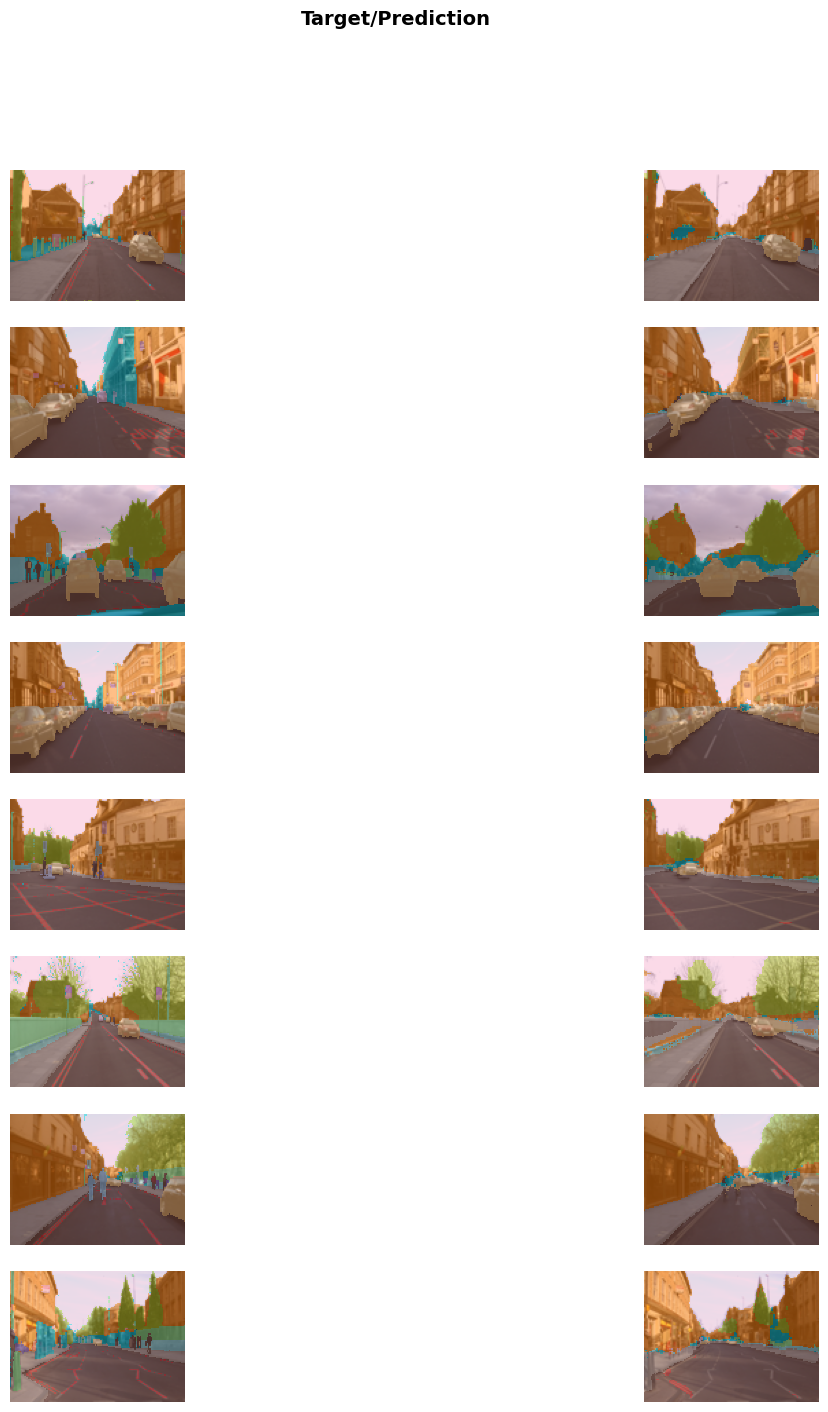

In [ ]:
learn.show_results(max_n = 8, figsize = (15, 16))